In [1]:
import torch
import torch.nn as nn

import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
learning_rate = 0.001
epochs = 25
batch_size = 32

In [3]:
transforms = transforms.Compose([transforms.ToTensor()])

train_DS = datasets.MNIST(
    "/content/drive/MyDrive/Visual memoirs/dataset/MNIST",
    download=True,
    train=True,
    transform=transforms
)

test_DS = datasets.MNIST(
    "/content/drive/MyDrive/Visual memoirs/dataset/MNIST",
    download=True,
    train=False,
    transform=transforms
)

train_DL = DataLoader(
    dataset=train_DS,
    batch_size=batch_size,
    shuffle=True
)

test_DL = DataLoader(
    dataset=test_DS,
    batch_size=batch_size,
    shuffle=False
)

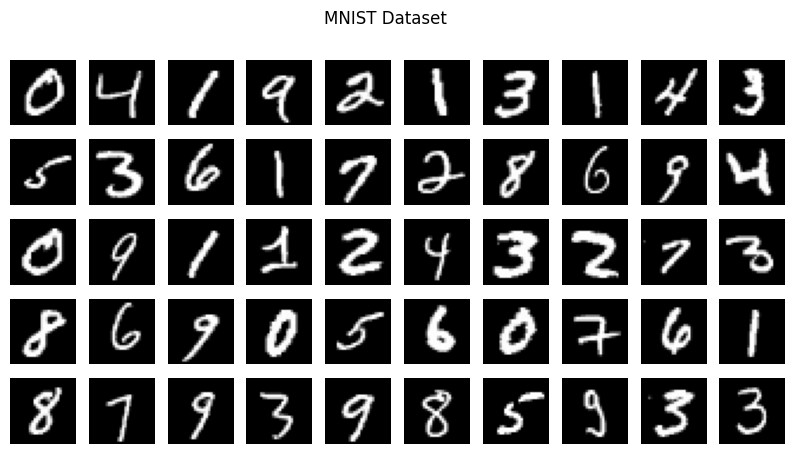

In [4]:
row, col = 10, 5

fig = plt.figure(figsize=(10, 5))

for idx in range(1, row * col + 1):
    ax = fig.add_subplot(col, row, idx)
    ax.imshow(train_DS.data[idx], cmap='gray')
    ax.axis('off')

fig.suptitle('MNIST Dataset')
plt.show()

In [16]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.feature = nn.Sequential(
            nn.ZeroPad2d(2), # 1,28,28 -> 1,32,32
            nn.Conv2d(1, 6, 5), # 1,32,32 -> 6,32,32
            nn.Tanh(),

            nn.AvgPool2d(2, 2), # 6,28,28 -> 6,14,14
            nn.Tanh(),

            nn.Conv2d(6, 16, 5), # 6,14,14 -> 16,10,10
            nn.Tanh(),

            nn.AvgPool2d(2, 2), # 16,10,10 -> 16,5,5
            nn.Tanh()
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = LeNet()
model.to(device)

LeNet(
  (feature): Sequential(
    (0): ZeroPad2d((2, 2, 2, 2))
    (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (2): Tanh()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Tanh()
    (5): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (6): Tanh()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [17]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

def train(model, train_DL, optimizer, criterion, epochs, device):
    model.train()
    loss_history = []

    for epoch in range(epochs):
        running_loss = 0
        for x_batch, y_batch in train_DL:
            optimizer.zero_grad()
            # 순전파
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_hat = model(x_batch)
            loss = criterion(y_hat, y_batch)
            # 역전파
            loss.backward()
            optimizer.step()
            loss_b = loss.item() * x_batch.shape[0]
            running_loss += loss_b
        loss_e = running_loss / len(train_DL.dataset)
        loss_history.append(loss_e)
        print(f"Epoch: {epoch + 1}, train loss: {round(loss_e, 3)}")

    return loss_history

def plot(loss_history):
    plt.figure(figsize=(5, 4))
    plt.plot(loss_history, label='Training Loss', color='blue')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, epochs)
    plt.show()

Epoch: 1, train loss: 1.563
Epoch: 2, train loss: 1.496
Epoch: 3, train loss: 1.487
Epoch: 4, train loss: 1.482
Epoch: 5, train loss: 1.479
Epoch: 6, train loss: 1.477
Epoch: 7, train loss: 1.477
Epoch: 8, train loss: 1.474
Epoch: 9, train loss: 1.473
Epoch: 10, train loss: 1.472
Epoch: 11, train loss: 1.471
Epoch: 12, train loss: 1.471
Epoch: 13, train loss: 1.471
Epoch: 14, train loss: 1.47
Epoch: 15, train loss: 1.47
Epoch: 16, train loss: 1.469
Epoch: 17, train loss: 1.469
Epoch: 18, train loss: 1.469
Epoch: 19, train loss: 1.468
Epoch: 20, train loss: 1.468
Epoch: 21, train loss: 1.468
Epoch: 22, train loss: 1.467
Epoch: 23, train loss: 1.467
Epoch: 24, train loss: 1.467
Epoch: 25, train loss: 1.467


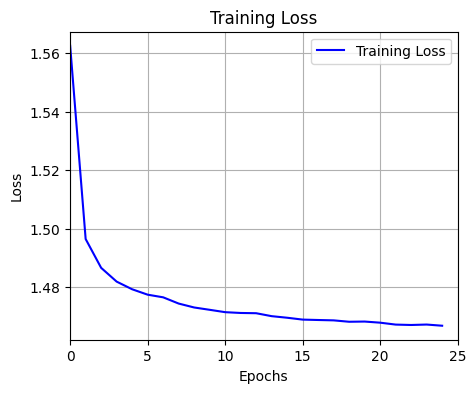

In [18]:
loss_history = train(model, train_DL, optimizer, criterion, epochs, device)
plot(loss_history)